# Primary loop transient

In [74]:
import os
os.chdir('/projects/MSR_species_tracking/virtual_test_bed/msr/msfr_coupled/transient')

In [75]:
import pandas as pd
neutronics = pd.read_csv('run_neutronics_out.csv')
th = pd.read_csv('run_neutronics_out_ns0.csv')
sam = pd.read_csv('run_neutronics_out_ns0_sam_balance_of_plant0_csv.csv')
for key in th:
    if key != 'time':
        th.loc[th['time'] < 20, key] = th[key][th['time'] == 20].iloc[-1]
for key in sam:
    if key != 'time':
        sam.loc[sam['time'] < 20, key] = sam[key][sam['time'] == 20].iloc[-1]
th.keys()

Index(['time', 'dT', 'flow_hx_bot', 'flow_hx_top', 'heat_exchanger_T_ambient',
       'max_flow_T', 'max_v', 'mdot', 'min_flow_T', 'pump',
       'total_fission_source', 'total_power', 'total_power_density', 'lambda'],
      dtype='object')

/apps/local/anaconda/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: The handle <matplotlib.lines.Line2D object at 0x2aaadf5be710> has a label of '_line0' which cannot be automatically added to the legend.


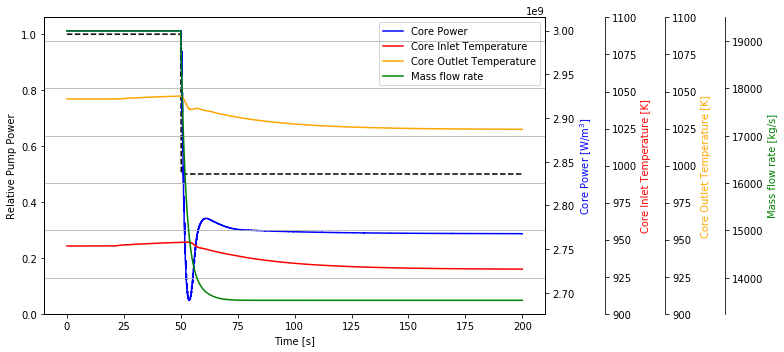

In [76]:
import matplotlib.pyplot as plt 
fig, host = plt.subplots(figsize=(11,5)) # (width, height) in inches
    
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par4 = host.twinx()
    
# host.set_xlim(0, 2)
# host.set_ylim(0, 2)
par2.set_ylim(900, 1100)
par3.set_ylim(900, 1100)
host.set_ylim(0, 1.06)
    
host.set_xlabel("Time [s]")
host.set_ylabel("Relative Pump Power")
par1.set_ylabel("Core Power [W/m$^3$]")
par2.set_ylabel("Core Inlet Temperature [K]")
par3.set_ylabel("Core Outlet Temperature [K]")
par4.set_ylabel("Mass flow rate [kg/s]")

p1, = host.plot(th['time'], th['pump'], color='black', linestyle='--')
p2, = par1.plot(sam['time'], sam['core_power'], color='blue', label="Core Power")
p3, = par2.plot(sam['time'], sam['Core_T_in'], color='red', label="Core Inlet Temperature")
p4, = par3.plot(sam['time'], sam['Core_T_out'], color='orange', label="Core Outlet Temperature")
p5, = par4.plot(th['time'], th['mdot'], color='green', label="Mass flow rate")

lns = [p1, p2, p3, p4, p5]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))
par3.spines['right'].set_position(('outward', 120))
par4.spines['right'].set_position(('outward', 180))

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())
par4.yaxis.label.set_color(p5.get_color())

plt.grid()
fig.tight_layout()
#plt.savefig("pyplot_multiple_y-axis.pdf")

/apps/local/anaconda/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: The handle <matplotlib.lines.Line2D object at 0x2aaadf692c90> has a label of '_line0' which cannot be automatically added to the legend.


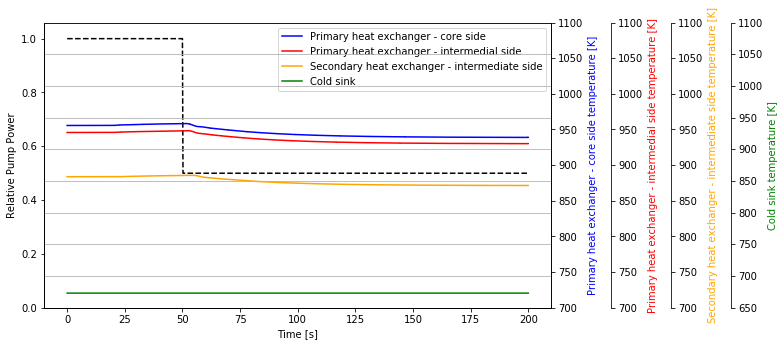

In [77]:
import matplotlib.pyplot as plt 
fig, host = plt.subplots(figsize=(11,5)) # (width, height) in inches
    
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par4 = host.twinx()
    
# host.set_xlim(0, 2)
# host.set_ylim(0, 2)
par1.set_ylim(700, 1100)
par2.set_ylim(700, 1100)
par3.set_ylim(700, 1100)
par4.set_ylim(650, 1100)
host.set_ylim(0, 1.06)
    
host.set_xlabel("Time [s]")
host.set_ylabel("Relative Pump Power")
par1.set_ylabel("Primary heat exchanger - core side temperature [K]")
par2.set_ylabel("Primary heat exchanger - intermedial side temperature [K]")
par3.set_ylabel("Secondary heat exchanger - intermediate side temperature [K]")
par4.set_ylabel("Cold sink temperature [K]")

p1, = host.plot(th['time'], th['pump'], color='black', linestyle='--')
p2, = par1.plot(sam['time'], sam['IHX1_P4:temperature'], color='blue', label="Primary heat exchanger - core side")
p3, = par2.plot(sam['time'], sam['IHX1_P3:temperature'], color='red', label="Primary heat exchanger - intermedial side")
p4, = par3.plot(sam['time'], sam['pump2:temperature'], color='orange', label="Secondary heat exchanger - intermediate side")
p5, = par4.plot(sam['time'], sam['time']*0.0+673.15, color='green', label="Cold sink")

lns = [p1, p2, p3, p4, p5]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))
par3.spines['right'].set_position(('outward', 120))
par4.spines['right'].set_position(('outward', 180))

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())
par4.yaxis.label.set_color(p5.get_color())

plt.grid()
fig.tight_layout()
#plt.savefig("pyplot_multiple_y-axis.pdf")